# 不同尺寸和拟设线路结构下，二维 $J_1J_2$ 模型的基态能量计算

## 12 比特 
对于一个具有开放边界条件的 12 比特的海森堡晶格的几何图为
![12比特](./src/12_qubits_geo.png)
### 包含次近邻相互作用量子门

step is 0 	 期望值：23.062258
step is 50 	 期望值：-47.63805
step is 100 	 期望值：-50.158096
step is 150 	 期望值：-50.734905
step is 200 	 期望值：-51.17813
step is 250 	 期望值：-51.242035
step is 300 	 期望值：-50.95169
step is 350 	 期望值：-51.044415
step is 400 	 期望值：-51.083084
step is 450 	 期望值：-51.354465
step is 500 	 期望值：-51.58337
step is 550 	 期望值：-51.592552
step is 600 	 期望值：-51.600407
step is 650 	 期望值：-51.70284
step is 700 	 期望值：-51.5203
step is 750 	 期望值：-51.911266
step is 800 	 期望值：-52.21023
step is 850 	 期望值：-51.33059
step is 900 	 期望值：-52.06789
step is 950 	 期望值：-52.000416
数据收集完成啦！


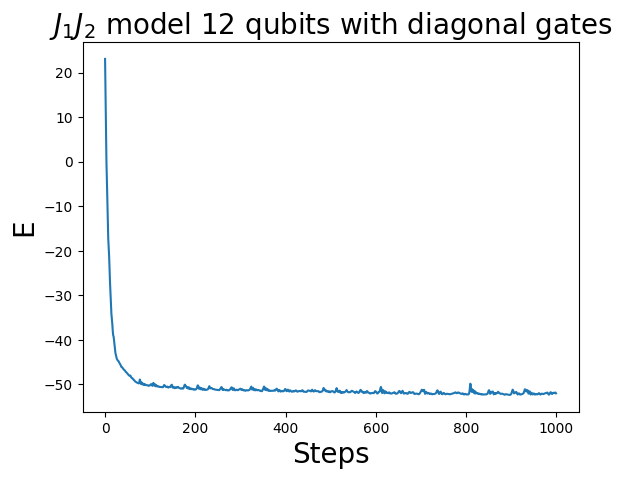

In [44]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7]:
        circ_ += com_gate(i, i+4)
        
    for i in [0, 1, 2, 4, 5, 6]:
        circ_ += com_gate(i, i+5)
        
    for i in [1, 2, 3, 5, 6, 7]:
        circ_ += com_gate(i, i+3)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 12
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(1000):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_12_qubits_with_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 12 qubits with diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 不包含次近邻相互作用量子门

step is 0 	 期望值：23.434917
step is 50 	 期望值：-49.15279
step is 100 	 期望值：-49.846992
step is 150 	 期望值：-50.380356
step is 200 	 期望值：-50.423615
step is 250 	 期望值：-50.75518
step is 300 	 期望值：-50.762722
step is 350 	 期望值：-51.092873
step is 400 	 期望值：-51.473297
step is 450 	 期望值：-51.54914
step is 500 	 期望值：-51.50353
step is 550 	 期望值：-51.51851
step is 600 	 期望值：-51.725754
step is 650 	 期望值：-51.725456
step is 700 	 期望值：-51.789314
step is 750 	 期望值：-51.478485
step is 800 	 期望值：-51.975925
step is 850 	 期望值：-51.792473
step is 900 	 期望值：-51.881668
step is 950 	 期望值：-51.78735
数据收集完成啦！


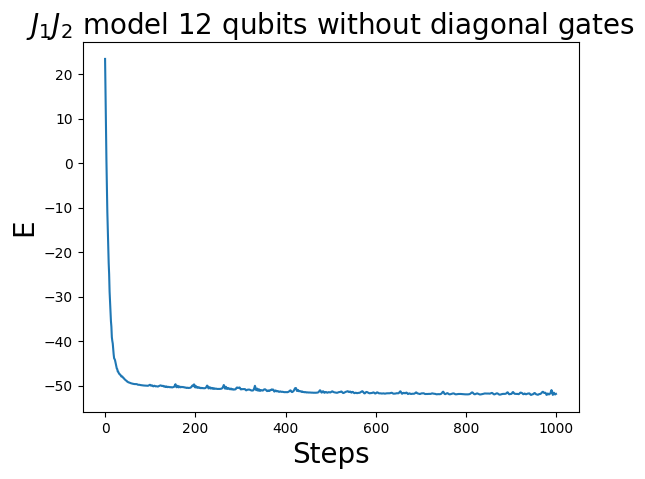

In [45]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7]:
        circ_ += com_gate(i, i+4)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 12
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(1000):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_12_qubits_without_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 12 qubits without diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 两者对比

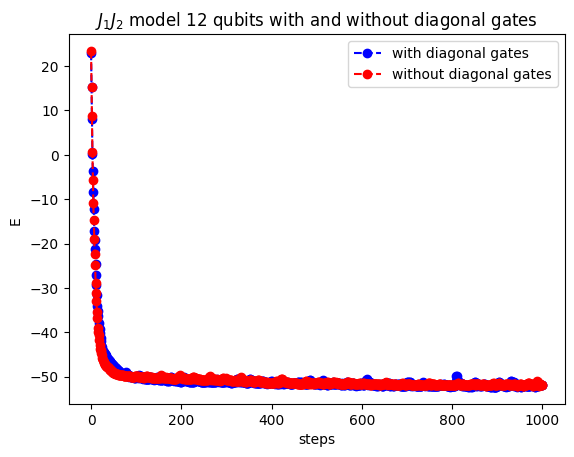

In [46]:
a = np.load('./src/result_12_qubits_with_diagonal_gates.npy', allow_pickle=True)
b = np.load('./src/result_12_qubits_without_diagonal_gates.npy', allow_pickle=True)

plt.figure()
plt.plot(a, label = 'with diagonal gates', linestyle='--', marker='o', color='b')
plt.plot(b, label = 'without diagonal gates', linestyle='--', marker='o', color='r') 
plt.title('$J_1J_2$ model 12 qubits with and without diagonal gates', fontsize=12)
plt.legend() 
plt.xlabel('steps', fontsize=10)
plt.ylabel('E ', fontsize=10)
plt.savefig('./src/result_12_qubits.png')
plt.show()

## 16 比特 
对于一个具有开放边界条件的 16 比特的海森堡晶格的几何图为
![16比特](./src/16_qubits_geo.png)
### 包含次近邻相互作用量子门

step is 0 	 期望值：33.287594
step is 50 	 期望值：-65.337425
step is 100 	 期望值：-66.96981
step is 150 	 期望值：-68.30721
step is 200 	 期望值：-68.150024
step is 250 	 期望值：-68.407005
step is 300 	 期望值：-69.02451
step is 350 	 期望值：-69.44017
step is 400 	 期望值：-69.49723
step is 450 	 期望值：-69.597435
step is 500 	 期望值：-69.53289
step is 550 	 期望值：-69.671776
step is 600 	 期望值：-69.79641
step is 650 	 期望值：-69.148346
step is 700 	 期望值：-69.439705
step is 750 	 期望值：-69.9456
step is 800 	 期望值：-70.24786
step is 850 	 期望值：-70.20517
step is 900 	 期望值：-70.4961
step is 950 	 期望值：-70.41625
数据收集完成啦！


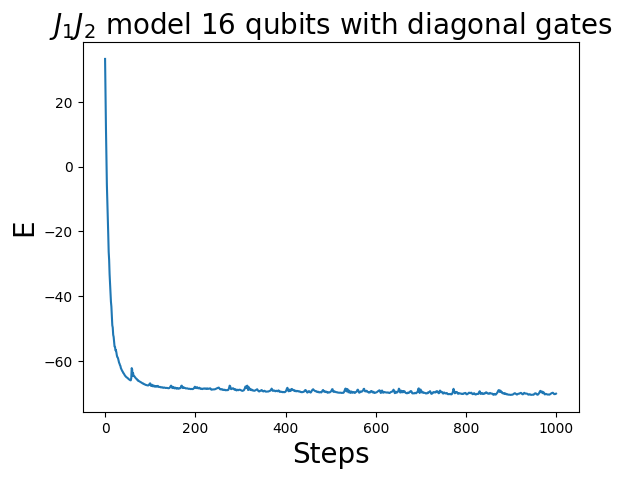

In [47]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
        circ_ += com_gate(i, i+4)
        
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]:
        circ_ += com_gate(i, i+5)
        
    for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]:
        circ_ += com_gate(i, i+3)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 16
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(1000):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_16_qubits_with_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 16 qubits with diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 不包含次近邻相互作用量子门

step is 0 	 期望值：32.888374
step is 50 	 期望值：-65.31812
step is 100 	 期望值：-67.30599
step is 150 	 期望值：-68.01439
step is 200 	 期望值：-67.96843
step is 250 	 期望值：-68.51861
step is 300 	 期望值：-69.037346
step is 350 	 期望值：-69.152306
step is 400 	 期望值：-69.17836
step is 450 	 期望值：-69.40711
step is 500 	 期望值：-69.48741
step is 550 	 期望值：-69.81838
step is 600 	 期望值：-69.979965
step is 650 	 期望值：-69.621346
step is 700 	 期望值：-69.46647
step is 750 	 期望值：-70.68207
step is 800 	 期望值：-70.794754
step is 850 	 期望值：-70.80781
step is 900 	 期望值：-70.41889
step is 950 	 期望值：-70.60571
数据收集完成啦！


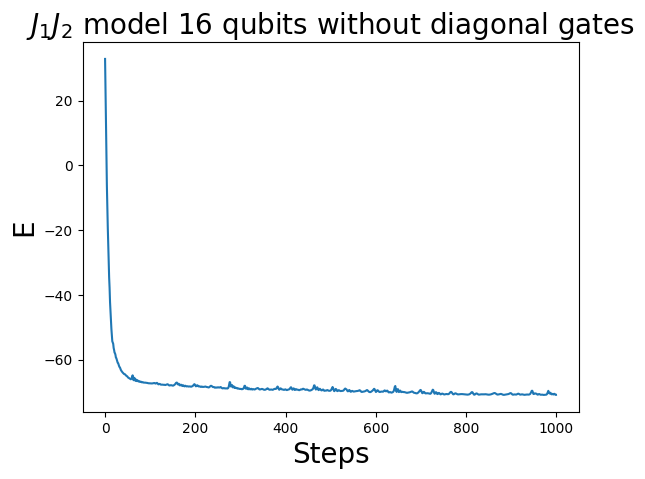

In [48]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]:
        circ_ += com_gate(i, i+4)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 16
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(1000):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_16_qubits_without_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 16 qubits without diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 两者对比

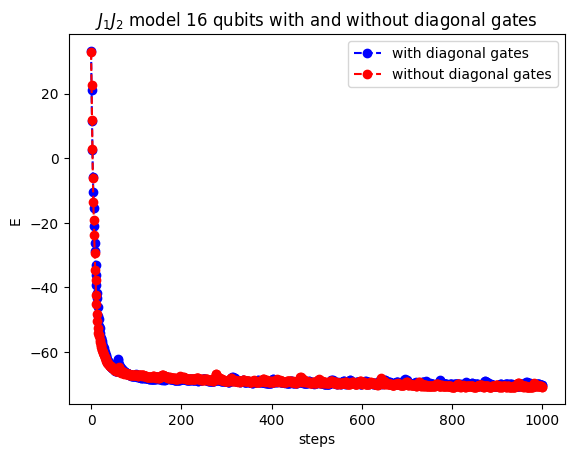

In [49]:
a = np.load('./src/result_16_qubits_with_diagonal_gates.npy', allow_pickle=True)
b = np.load('./src/result_16_qubits_without_diagonal_gates.npy', allow_pickle=True)

plt.figure()
plt.plot(a, label = 'with diagonal gates', linestyle='--', marker='o', color='b')
plt.plot(b, label = 'without diagonal gates', linestyle='--', marker='o', color='r') 
plt.title('$J_1J_2$ model 16 qubits with and without diagonal gates', fontsize=12)
plt.legend() 
plt.xlabel('steps', fontsize=10)
plt.ylabel('E ', fontsize=10)
plt.savefig('./src/result_16_qubits.png')
plt.show()

## 20 比特 
对于一个具有开放边界条件的 20 比特的海森堡晶格的几何图为
![20比特](./src/20_qubits_geo.png)
### 包含次近邻相互作用量子门

step is 0 	 期望值：43.360153
step is 50 	 期望值：-79.7228
step is 100 	 期望值：-83.56285
step is 150 	 期望值：-84.50164
step is 200 	 期望值：-84.42636
step is 250 	 期望值：-85.63285
step is 300 	 期望值：-85.27663
step is 350 	 期望值：-85.76064
step is 400 	 期望值：-85.312935
step is 450 	 期望值：-86.223656
数据收集完成啦！


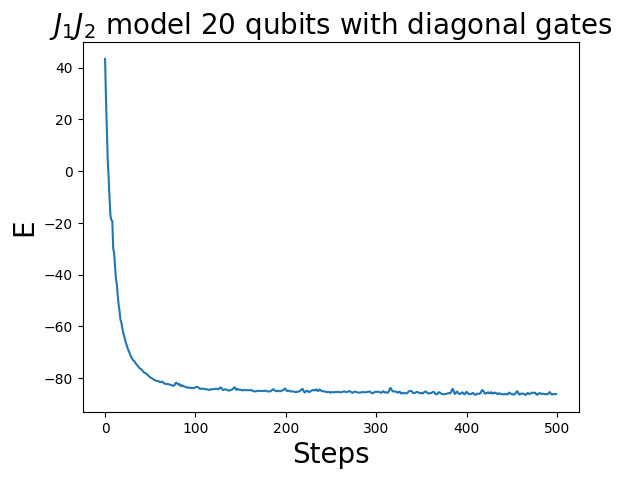

In [51]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        circ_ += com_gate(i, i+4)
        
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]:
        circ_ += com_gate(i, i+5)
        
    for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]:
        circ_ += com_gate(i, i+3)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 20
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(500):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_20_qubits_with_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 20 qubits with diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 不包含次近邻相互作用量子门

step is 0 	 期望值：42.88587
step is 50 	 期望值：-82.23214
step is 100 	 期望值：-85.50037
step is 150 	 期望值：-86.43644
step is 200 	 期望值：-86.585785
step is 250 	 期望值：-86.73325
step is 300 	 期望值：-87.11371
step is 350 	 期望值：-87.60022
step is 400 	 期望值：-87.36952
step is 450 	 期望值：-88.09056
数据收集完成啦！


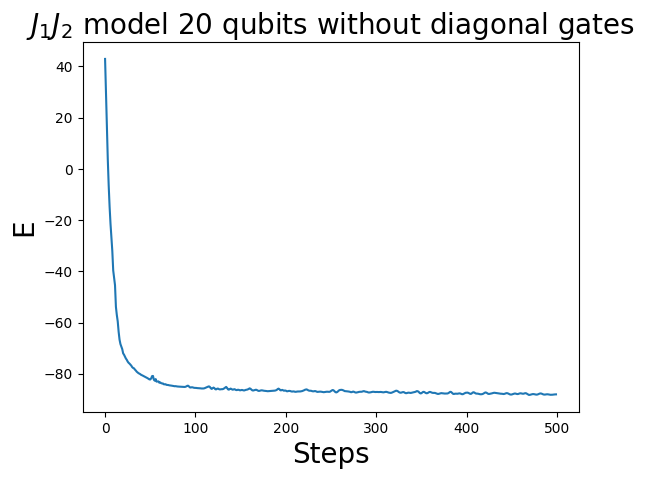

In [52]:
from mindquantum import *
import mindspore as ms
import numpy as np
import matplotlib.pyplot as plt
from mindspore.nn import Adam, TrainOneStepCell
ms.set_seed(1) 
ms.set_context(mode=ms.PYNATIVE_MODE, device_target="CPU")

def com_gate(qubit_0, qubit_1):
    circ_ = Circuit()
    circ_ += XX(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += YY(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    circ_ += ZZ(f'{qubit_0}+{qubit_1}').on([qubit_0, qubit_1])
    return circ_

def circ_layer(prefix='0'):
    circ_ = Circuit([RZ(f'Z{i}').on(i) for i in range(qubit_num)])
    
    for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]:
        circ_ += com_gate(i, i+1)
        
    for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
        circ_ += com_gate(i, i+4)
    
    circ_ = add_prefix(circ_, prefix)
    return circ_

qubit_num = 20
ansatz = Circuit()
ansatz += Circuit([RX(f'X{i}').on(i) for i in range(qubit_num)])
ansatz += Circuit([RY(f'Y{i}').on(i) for i in range(qubit_num)])

for i in range(7):
    ansatz += circ_layer(prefix=f'{i}')
    
ansatz.as_ansatz()

sim = Simulator('mqvector', ansatz.n_qubits)

op = [QubitOperator(f'X{i} X{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'X{i} X{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'X{i} X{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} X{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Y{i} Y{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Y{i} Y{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Y{i} Y{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Y{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Z{i} Z{i+1}') for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Z{i} Z{i+4}') for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Z{i} Z{i+5}', 0.5) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} Z{i+3}', 0.5) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'X{i} Y{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'X{i} Y{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'X{i} Y{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'X{i} Y{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Y{i} Z{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Y{i} Z{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Y{i} Z{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Y{i} Z{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

op += [QubitOperator(f'Z{i} X{i+1}', 2) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18]]
op += [QubitOperator(f'Z{i} X{i+4}', 2) for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]]
op += [QubitOperator(f'Z{i} X{i+5}', 1) for i in [0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14]]
op += [QubitOperator(f'Z{i} X{i+3}', 1) for i in [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15]]

ham = Hamiltonian(sum(op))

grad_ops = sim.get_expectation_with_grad(ham, ansatz)
qnet = MQAnsatzOnlyLayer(grad_ops)
opti = Adam(qnet.trainable_params(), learning_rate=0.1)  
net = TrainOneStepCell(qnet, opti)

res_his = []
res_0 = 0
for i in range(500):
    res = net()
    res_his.append(res.asnumpy()[0])
    if abs(res_0 - res) <= 1e-8:
        break
    res_0 = res
    if i % 50 == 0:
        print(f'step is {i} \t 期望值：{res[0]}')

np.save('./src/result_20_qubits_without_diagonal_gates.npy', np.array(res_his))
print('数据收集完成啦！')

plt.figure()
plt.plot(res_his) 
plt.title(r"$J_1J_2$ model 20 qubits without diagonal gates", fontsize=20)
plt.xlabel('Steps', fontsize=20)
plt.ylabel('E', fontsize=20)
plt.show()

### 两者对比

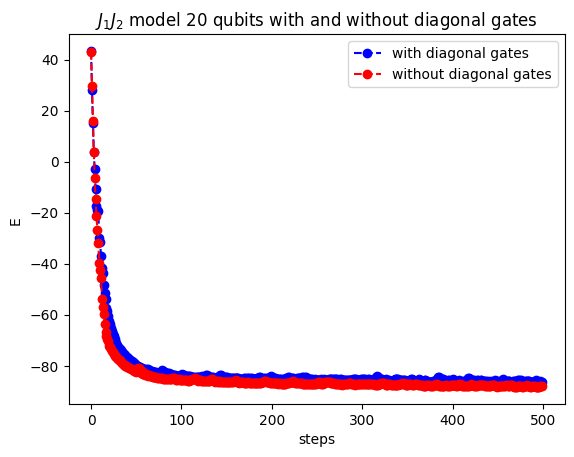

In [53]:
a = np.load('./src/result_20_qubits_with_diagonal_gates.npy', allow_pickle=True)
b = np.load('./src/result_20_qubits_without_diagonal_gates.npy', allow_pickle=True)

plt.figure()
plt.plot(a, label = 'with diagonal gates', linestyle='--', marker='o', color='b')
plt.plot(b, label = 'without diagonal gates', linestyle='--', marker='o', color='r') 
plt.title('$J_1J_2$ model 20 qubits with and without diagonal gates', fontsize=12)
plt.legend() 
plt.xlabel('steps', fontsize=10)
plt.ylabel('E ', fontsize=10)
plt.savefig('./src/result_20_qubits.png')
plt.show()